# Linear Programming: Geometry, Duality & Sensitivity

## Objective
To understand linear programming through:
- Graphical solution
- Extreme point optimality
- Primal formulation
- Dual formulation
- Sensitivity interpretation

## Problem Statement

Maximize the objective function:

\begin{aligned}
Z = 3x_1 + 5x_2
\end{aligned}

subject to the constraints:

\begin{aligned}
x_1 + 2x_2 &\le 8 \\
3x_1 + 2x_2 &\le 12 \\
x_1, x_2 &\ge 0
\end{aligned}

This is a two-variable linear programming problem suitable for
graphical analysis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pulp import LpMaximize, LpProblem, LpVariable, value

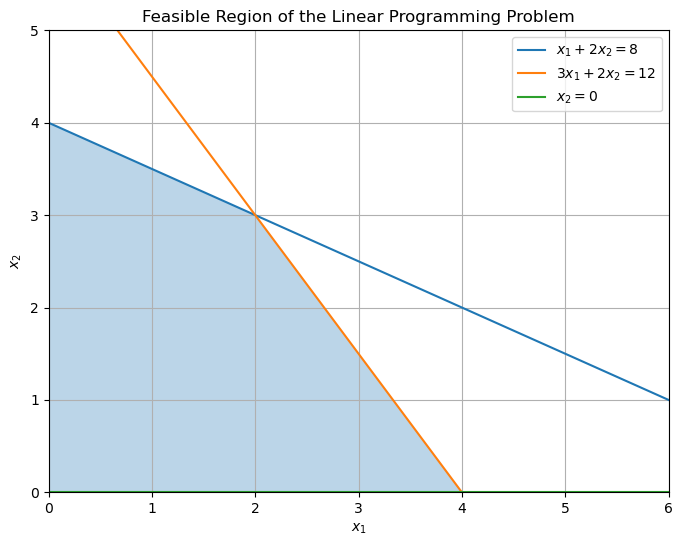

In [2]:
x1 = np.linspace(0, 6, 400)

x2_c1 = (8 - x1) / 2
x2_c2 = (12 - 3*x1) / 2
x2_zero = np.zeros_like(x1)

plt.figure(figsize=(8,6))
plt.plot(x1, x2_c1, label=r'$x_1 + 2x_2 = 8$')
plt.plot(x1, x2_c2, label=r'$3x_1 + 2x_2 = 12$')
plt.plot(x1, x2_zero, label=r'$x_2 = 0$')

x2_feasible = np.maximum(0, np.minimum(x2_c1, x2_c2))
plt.fill_between(x1, x2_feasible, alpha=0.3)

plt.xlim(0,6)
plt.ylim(0,5)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title("Feasible Region of the Linear Programming Problem")
plt.legend()
plt.grid(True)
plt.show()

In [3]:
points = {
    "O": (0, 0),
    "A": (0, 4),
    "B": (2, 3),
    "C": (4, 0)
}

def objective(x1, x2):
    return 3*x1 + 5*x2

for name, (x1_val, x2_val) in points.items():
    print(f"{name}: x1={x1_val}, x2={x2_val}, Z={objective(x1_val, x2_val)}")


O: x1=0, x2=0, Z=0
A: x1=0, x2=4, Z=20
B: x1=2, x2=3, Z=21
C: x1=4, x2=0, Z=12


# Interpretation of Graphical Solution

The feasible region is a convex polygon formed by the intersection
of all constraint half-spaces. By the fundamental theorem of linear
programming, the optimal solution occurs at an extreme point of the
feasible region.

Evaluating the objective function at each corner point shows that
the maximum value is attained at $(x_1, x_2) = (2,3)$ with $Z = 21$.

In [4]:
model = LpProblem("Primal_LP", LpMaximize)

x1 = LpVariable("x1", lowBound=0)
x2 = LpVariable("x2", lowBound=0)

model += 3*x1 + 5*x2
model += x1 + 2*x2 <= 8
model += 3*x1 + 2*x2 <= 12

model.solve()

print("Optimal x1 =", value(x1))
print("Optimal x2 =", value(x2))
print("Optimal Z =", value(model.objective))

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/varun-vaibhav/miniconda3/envs/ds-env/lib/python3.13/site-packages/pulp/apis/../solverdir/cbc/linux/i64/cbc /tmp/6db39bdf7a8e4828a7ae658f714fb16a-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/6db39bdf7a8e4828a7ae658f714fb16a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 7.9999998 (2)
0  Obj -0 Dual inf 7.9999998 (2)
2  Obj 21
Optimal - objective value 21
Optimal objective 21 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Optimal x1 = 2.0
Optimal x2 = 3.0
Optima

## Dual Problem

The dual of the primal maximization problem is given by:

\begin{aligned}
\min \; W = 8y_1 + 12y_2
\end{aligned}

subject to:
\begin{aligned}
y_1 + 3y_2 &\ge 3 \\
2y_1 + 2y_2 &\ge 5 \\
y_1, y_2 &\ge 0
\end{aligned}

In [5]:
dual = LpProblem("Dual_LP", LpMaximize)

y1 = LpVariable("y1", lowBound=0)
y2 = LpVariable("y2", lowBound=0)

dual += -(8*y1 + 12*y2)
dual += y1 + 3*y2 >= 3
dual += 2*y1 + 2*y2 >= 5

dual.solve()

print("y1 =", value(y1))
print("y2 =", value(y2))
print("Dual optimal value =", -value(dual.objective))

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/varun-vaibhav/miniconda3/envs/ds-env/lib/python3.13/site-packages/pulp/apis/../solverdir/cbc/linux/i64/cbc /tmp/b67955f8fbd849668f58e802b5553372-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/b67955f8fbd849668f58e802b5553372-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Primal inf 3.4999998 (2)
2  Obj -21
Optimal - objective value -21
Optimal objective -21 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

y1 = 2.25
y2 = 0.25
Dual optimal value = 21.0


## Strong Duality

The optimal value of the primal problem is
\
Z* = 21.

The optimal value of the dual problem is
\
W* = 21.

Since the optimal values of the primal and dual problems are equal,
the strong duality theorem for linear programming is verified.

In [6]:
print("Shadow Prices (Dual Variables):")
for name, constraint in model.constraints.items():
    print(f"{name}: {constraint.pi}")

print("\nReduced Costs:")
for var in model.variables():
    print(f"{var.name}: {var.dj}")

Shadow Prices (Dual Variables):
_C1: 2.25
_C2: 0.25

Reduced Costs:
x1: -0.0
x2: -0.0


## Sensitivity Analysis

The shadow prices represent the marginal increase in the optimal
objective value corresponding to a unit increase in the right-hand
side of each constraint, within allowable ranges.

A positive shadow price indicates that the corresponding constraint
is binding and that relaxing it would improve the objective value.
Reduced costs indicate how much the objective coefficient of a
non-basic variable must improve for it to enter the optimal basis.

Sensitivity analysis provides valuable insight into the stability
and economic interpretation of the optimal solution.